### Convex feasibility problem for random balls

$\newcommand{\n}[1]{\left\|#1 \right\|}$ 
$\renewcommand{\a}{\alpha}             $ 
$\renewcommand{\b}{\beta}              $ 
$\renewcommand{\c}{\gamma}             $ 
$\renewcommand{\d}{\delta}             $ 
$\newcommand{\D}{\Delta}               $ 
$\newcommand{\la}{\lambda}             $ 
$\renewcommand{\t}{\tau}               $ 
$\newcommand{\s}{\sigma}               $ 
$\newcommand{\e}{\varepsilon}          $ 
$\renewcommand{\th}{\theta}            $ 
$\newcommand{\x}{\bar x}               $ 
$\newcommand{\R}{\mathbb R}            $ 
$\newcommand{\N}{\mathbb N}            $ 
$\newcommand{\Z}{\mathbb Z}            $ 
$\newcommand{\E}{\mathcal E}           $ 
$\newcommand{\lr}[1]{\left\langle #1\right\rangle}$
$\newcommand{\nf}[1]{\nabla f(#1)}     $
$\newcommand{\hx}{\hat x}               $
$\newcommand{\hy}{\hat y}               $
$\DeclareMathOperator{\prox}{prox}      $
$\DeclareMathOperator{\argmin}{argmin}  $
$\DeclareMathOperator{\dom}{dom}        $
$\DeclareMathOperator{\id}{Id}          $
$\DeclareMathOperator{\conv}{conv}      $

We want to find a point $x\in \bigcap_{i=1}^m S_i$, where $S_i \in \R^n$ are some random balls.

This `ipynb` file illustrates the performance of simultaneous projection algorithm and adaptive GRAAL. If you want to compare these methods for many random problems, run `convex_feasibility_problem_for_random_balls.py`

In [1]:
from fixed_points import *
import matplotlib as mpl


%load_ext autoreload
%autoreload 2
%matplotlib inline

mpl.rc('lines', linewidth=2)
mpl.rcParams.update(
    {'font.size': 12, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
mpl.rcParams['xtick.major.pad'] = 2
mpl.rcParams['ytick.major.pad'] = 2

Generate the data

In [13]:
#n, m = 30, 100
n, m = 1000, 2000

# fix a random generator
gen = 0
np.random.seed(gen)

# define balls
C = np.random.normal(0, 100, (m, n))
R = LA.norm(C,axis=1) + 0.1

# starting point
x0 = np.mean(C, axis=0)

# define operator T

def T(x):
    dist = LA.norm(x - C, axis=1)
    ind = np.where(dist > R)
    # define the number of projection that we have to compute
    n_ind = ind[0].shape[0]
    C_ind = C[ind]
    # compute projections only for those balls that are needed
    Y = (R[ind] / dist[ind] * (x - C_ind).T).T + C_ind
    return ((np.sum(Y, axis=0) + (m - n_ind)*x)) / m


In [14]:
N = 1000

ans1 = krasn_mann(T, x0, 0, numb_iter=N)
ans2 = fixed_point_agraal(T, x0, numb_iter=N, phi=1.5, output=False)

Time execution of K-M: 27.43374926
1
Time execution of aGRAAL: 27.368286501999997


Show the results:

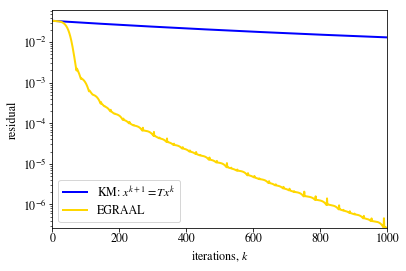

In [15]:
plt.plot(ans1[0],'b',label="KM: $x^{k+1}=Tx^k$")
plt.plot(ans2[0],'#FFD700', label="aGRAAL")

plt.yscale('log')
plt.legend()
plt.xlim(0,N)
plt.ylim(0)

plt.xlabel(u'iterations, $k$')
plt.ylabel('residual')

plt.legend()
#plt.savefig('figures/KM-Graal.pdf',bbox_inches='tight')
plt.show()
plt.clf()

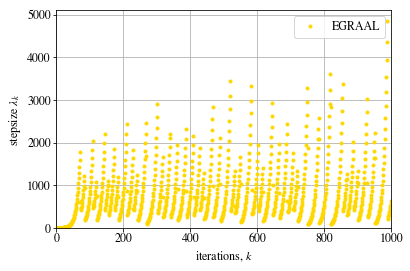

In [16]:
plt.plot(ans2[2], '.', color='#FFD700', label="aGRAAL")

plt.legend()
plt.xlim(0,N)
plt.ylim(0)

plt.xlabel(u'iterations, $k$')
plt.ylabel('stepsize $\lambda_k$')

plt.legend()
plt.grid()
#plt.savefig('figures/KM-Graal-steps2.pdf',bbox_inches='tight')
plt.show()
plt.clf()